In [3]:
#Done for 4-3-3 formation
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
df = pd.read_csv("FullData.csv")
df.head(7)

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,...,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,...,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,...,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,...,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,07/01/2011,2021.0,92,...,16,14,11,47,11,91,89,95,90,89
5,De Gea,Spain,GK,1.0,Manchester Utd,GK,1.0,07/01/2011,2019.0,90,...,12,21,19,40,13,86,88,87,85,90
6,Robert Lewandowski,Poland,LS,9.0,FC Bayern,ST,9.0,07/01/2014,2021.0,90,...,82,77,76,81,86,8,15,12,6,10


In [10]:
#simplifying the dataset
clean_df=df.drop(['National_Kit', 'Club_Kit','Club_Joining','Contract_Expiry','Birth_Date'],axis=1)
clean_df.head()

,Name,Nationality,National_Position,Club,Club_Position,Rating,Height,Weight,Preffered_Foot,Age,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,Real Madrid,LW,94,185 cm,80 kg,Right,32,...,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,FC Barcelona,RW,93,170 cm,72 kg,Left,29,...,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,FC Barcelona,LW,92,174 cm,68 kg,Right,25,...,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,FC Barcelona,ST,92,182 cm,85 kg,Right,30,...,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,FC Bayern,GK,92,193 cm,92 kg,Right,31,...,16,14,11,47,11,91,89,95,90,89


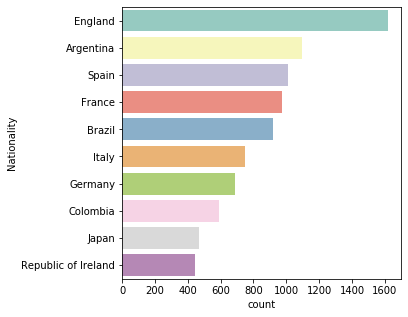

In [35]:
plt.figure(figsize=(5,5))
sns.countplot(y=clean_df.Nationality,palette="Set3",order=clean_df['Nationality'].value_counts().iloc[:10].index)
#A countplot showing the top 10 countries sorted by the number of players from their nation 
#This is just for a brief understanding about the contribution of each country

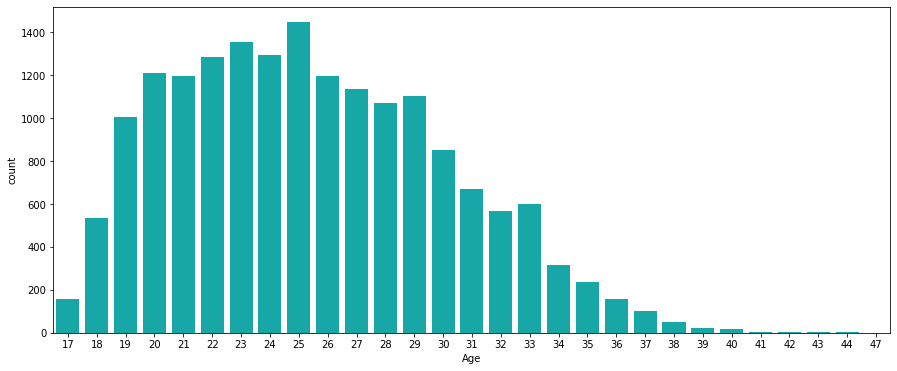

In [38]:
plt.figure(figsize=(15,6))
sns.countplot(x="Age",data=clean_df,color="c")  
#A bar graph representing the numbers of players in each age group. 

Text(0, 0.5, 'Shot Stopping Score')

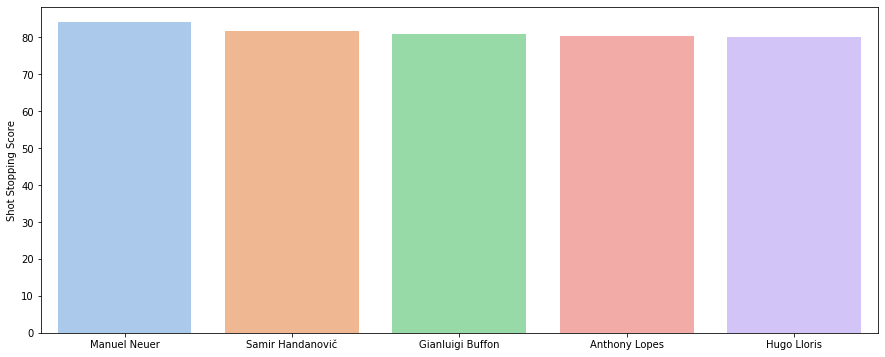

In [96]:
#Finding the best goalkeeper
#weights
a,b,c,d=0.5,1,2,3
clean_df['gk_Shot_Stopper'] = (b*df.Reactions + b*df.Composure + a*df.Speed + a*df.Strength + c*df.Jumping + b*df.GK_Positioning + c*df.GK_Diving + d*df.GK_Reflexes + b*df.GK_Handling)/(2*a + 4*b + 2*c + 1*d)
clean_df['gk_Sweeper'] = (b*df.Reactions + b*df.Composure + b*df.Speed + a*df.Short_Pass + a*df.Long_Pass + b*df.Jumping + b*df.GK_Positioning + b*df.GK_Diving + d*df.GK_Reflexes + b*df.GK_Handling + d*df.GK_Kicking + c*df.Vision)/(2*a + 4*b + 3*c + 2*d)
plt.figure(figsize=(15,6))

sd = clean_df.sort_values('gk_Shot_Stopper', ascending=False)[:5]
x1 = np.array(list(sd['Name']))
y1 = np.array(list(sd['gk_Shot_Stopper']))
sns.barplot(x1, y1, palette= "pastel")
plt.ylabel("Shot Stopping Score")


Text(0, 0.5, 'Sweeping Score')

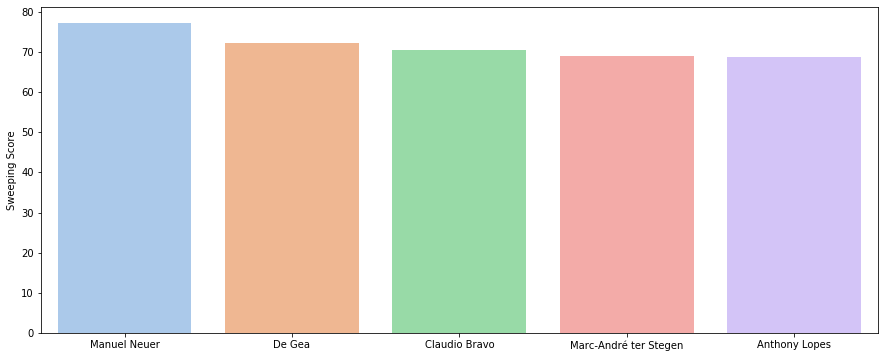

In [93]:
plt.figure(figsize=(15,6))
sd1 = clean_df.sort_values('gk_Sweeper', ascending=False)[:5]
x2 = np.array(list(sd1['Name']))
y2 = np.array(list(sd1['gk_Sweeper']))
sns.barplot(x2, y2, palette= "pastel")
plt.ylabel("Sweeping Score")


In [136]:
#Function of find the best Goal Keeper
clean_df['Gkscore']=clean_df['gk_Shot_Stopper']+clean_df['gk_Sweeper']
def BestGK():
    a=clean_df.nlargest(1, ['Gkscore'])['Name']
    b=list(a)
    for i in b:
        return i
BestGK()

'Manuel Neuer'

In [138]:
#Choosing the defenders
#1.The best Left Centre Back
clean_df['df_centre_backs'] = ( d*df.Reactions + c*df.Interceptions + d*df.Sliding_Tackle + d*df.Standing_Tackle + b*df.Vision+ b*df.Composure + b*df.Crossing +a*df.Short_Pass + b*df.Long_Pass+ c*df.Acceleration + b*df.Speed
+ d*df.Stamina + d*df.Jumping + d*df.Heading + b*df.Long_Shots + d*df.Marking + c*df.Aggression)/(6*b + 3*c + 7*d)
clean_df['df_wb_Wing_Backs'] = (b*df.Ball_Control + a*df.Dribbling + a*df.Marking + d*df.Sliding_Tackle + d*df.Standing_Tackle + a*df.Attacking_Position + c*df.Vision + c*df.Crossing + b*df.Short_Pass + c*df.Long_Pass + d*df.Acceleration +d*df.Speed + c*df.Stamina + a*df.Finishing)/(4*a + 2*b + 4*c + 4*d)
def bestlcb():
    Bestlcb= clean_df[(clean_df['Club_Position'] == 'LCB')].sort_values('df_centre_backs', ascending=False)[:1]

    return Bestlcb.values[0][0]
bestlcb()

'Sergio Ramos'

In [140]:
#2.The best right Centre Center:
def bestrcb():
    Bestrcb= clean_df[(clean_df['Club_Position'] == 'RCB')].sort_values('df_centre_backs', ascending=False)[:1]

    return Bestrcb.values[0][0]
bestrcb()

'Azpilicueta'

In [148]:
def bestlb():
    Bestlb=  clean_df[(clean_df['Club_Position'] == 'LWB') | (clean_df['Club_Position'] == 'LB')].sort_values('df_wb_Wing_Backs', ascending=False)[:1]
    return Bestlb.values[0][0]
bestlb()

'David Alaba'

In [149]:
def bestrb():
    Bestrb= clean_df[(clean_df['Club_Position'] == 'RWB') | (clean_df['Club_Position'] == 'RB')].sort_values('df_wb_Wing_Backs', ascending=False)[:1]
    return Bestrb.values[0][0]
bestrb()

'Kyle Walker'

In [150]:
#Now we need to set up the midfield
#Classify players as Controllers,PassMakers,Defensive midfielder
clean_df['mf_playmaker'] = (d*df.Ball_Control + d*df.Dribbling + a*df.Marking + d*df.Reactions + d*df.Vision + c*df.Attacking_Position + c*df.Crossing + d*df.Short_Pass + c*df.Long_Pass + c*df.Curve + b*df.Long_Shots + c*df.Freekick_Accuracy)/(1*a + 1*b + 4*c + 4*d)
clean_df['mf_beast'] = (d*df.Agility + c*df.Balance + b*df.Jumping + c*df.Strength + d*df.Stamina + a*df.Speed + c*df.Acceleration + d*df.Short_Pass + c*df.Aggression + d*df.Reactions + b*df.Marking + b*df.Standing_Tackle + b*df.Sliding_Tackle + b*df.Interceptions)/(1*a + 5*b + 4*c + 4*d)
clean_df['mf_controller'] = (b*df.Weak_foot + d*df.Ball_Control + a*df.Dribbling + a*df.Marking + a*df.Reactions + c*df.Vision + c*df.Composure + d*df.Short_Pass + d*df.Long_Pass)/(2*c + 3*d + 4*a)


Text(0, 0.5, 'PlayMaker Score')

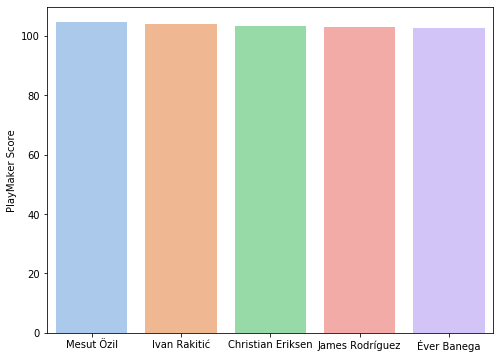

In [157]:
plt.figure(figsize=(8,6))
 
ss = clean_df[(clean_df['Club_Position'] == 'CAM') | (clean_df['Club_Position'] == 'LAM') | (clean_df['Club_Position'] == 'RAM')].sort_values('mf_playmaker', ascending=False)[:5]
x3 = np.array(list(ss['Name']))
y3 = np.array(list(ss['mf_playmaker']))
sns.barplot(x3, y3, palette='pastel')
plt.ylabel("PlayMaker Score")

In [158]:
def playmaker():
    return ss[:1].values[0][0]
playmaker()

'Mesut Özil'

In [159]:
def  Defensivemid():
    defmid=clean_df[(clean_df['Club_Position'] == 'RCM') | (clean_df['Club_Position'] == 'RM')].sort_values('mf_beast', ascending=False)[:1]
    return defmid.values[0][0]
Defensivemid()

"N'Golo Kanté"

In [160]:
def controller():
    cont=clean_df[(clean_df['Club_Position'] == 'LCM') | (clean_df['Club_Position'] == 'LM')].sort_values('mf_controller', ascending=False)[:1]
    return cont.values[0][0]
controller()

'Iniesta'

Text(0, 0.5, 'Left Wing')

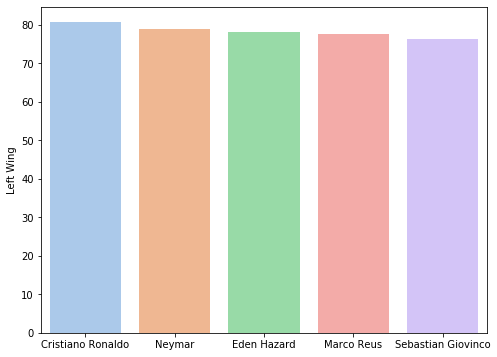

In [164]:
#Now lets come to the forwards!
#LW,RW,ST
clean_df['att_left_wing'] = (c*df.Weak_foot + c*df.Ball_Control + c*df.Dribbling + c*df.Speed + d*df.Acceleration + b*df.Vision + c*df.Crossing + b*df.Short_Pass + b*df.Long_Pass + b*df.Aggression + b*df.Agility + a*df.Curve + c*df.Long_Shots + b*df.Freekick_Accuracy + d*df.Finishing)/(a + 6*b + 6*c + 2*d)
clean_df['att_right_wing'] = (c*df.Weak_foot + c*df.Ball_Control + c*df.Dribbling + c*df.Speed + d*df.Acceleration + b*df.Vision + c*df.Crossing + b*df.Short_Pass + b*df.Long_Pass + b*df.Aggression + b*df.Agility + a*df.Curve + c*df.Long_Shots + b*df.Freekick_Accuracy + d*df.Finishing)/(a + 6*b + 6*c + 2*d)
clean_df['att_striker'] = (b*df.Weak_foot + b*df.Ball_Control + a*df.Vision + b*df.Aggression + b*df.Agility + a*df.Curve + a*df.Long_Shots + d*df.Balance + d*df.Finishing + d*df.Heading + c*df.Jumping + c*df.Dribbling)/(3*a + 4*b + 2*c + 3*d)

plt.figure(figsize=(8,6))
 
ss1 = clean_df[(clean_df['Club_Position'] == 'LW') | (clean_df['Club_Position'] == 'LM') | (clean_df['Club_Position'] == 'LS')].sort_values('att_left_wing', ascending=False)[:5]
x1 = np.array(list(ss1['Name']))
y1 = np.array(list(ss1['att_left_wing']))
sns.barplot(x1, y1, palette='pastel')
plt.ylabel("Left Wing")

In [165]:
def leftwinger():
    return ss1[:1].values[0][0]
leftwinger()

'Cristiano Ronaldo'

In [166]:
def rightwinger():
    rw=clean_df[(clean_df['Club_Position'] == 'RW') | (clean_df['Club_Position'] == 'RM') | (clean_df['Club_Position'] == 'RS')].sort_values('att_right_wing', ascending=False)[:1]
    return rw.values[0][0]
rightwinger()

'Lionel Messi'

Text(0, 0.5, 'Striker')

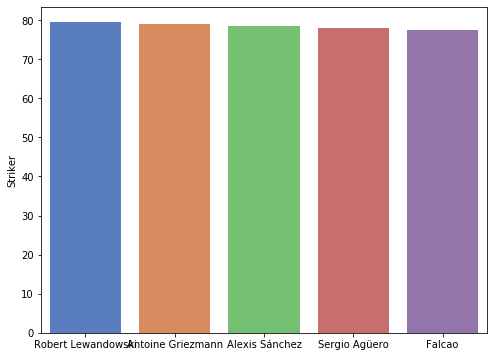

In [172]:
plt.figure(figsize=(8,6))
ss2 = clean_df[(clean_df['Club_Position'] == 'ST') | (clean_df['Club_Position'] == 'LS') | (clean_df['Club_Position'] == 'RS') | (clean_df['Club_Position'] == 'CF')].sort_values('att_striker', ascending=False)[:5]
x3 = np.array(list(ss2['Name']))
y3 = np.array(list(ss2['att_striker']))
sns.barplot(x3, y3, palette="muted")
plt.ylabel("Striker")

In [168]:
def striker():
    st=clean_df[(clean_df['Club_Position'] == 'ST') | (clean_df['Club_Position'] == 'LS') | (clean_df['Club_Position'] == 'RS') | (clean_df['Club_Position'] == 'CF')].sort_values('att_striker', ascending=False)[:1]
    return st.values[0][0]
striker()

'Robert Lewandowski'

In [183]:
#Now we can get the final team:
print("----The best Team----")
print("Striker: %s" % striker())
print("LeftWinger: %s" % leftwinger())
print("RightWinger: %s" % rightwinger())
print("Left midfield/cm: %s" % controller())
print("Central Attacker: %s" % playmaker())
print("Right Midfield: %s" %  Defensivemid())
print("RightBack: %s" % bestrb())
print("CenterBack: %s" % bestrcb())
print("CenterBack: %s" % bestlcb())
print("LeftBack: %s" % bestrb())

----The best Team----
Striker: Robert Lewandowski
LeftWinger: Cristiano Ronaldo
RightWinger: Lionel Messi
Left midfield/cm: Iniesta
Central Attacker: Mesut Özil
Right Midfield: N'Golo Kanté
RightBack: Kyle Walker
CenterBack: Azpilicueta
CenterBack: Sergio Ramos
LeftBack: Kyle Walker
